In [ ]:
#一个正态分布的统计图，直观感受正态分布
y=np.random.normal(1,40,10000)
plt.hist(y,bins=100)

In [4]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [8]:
x= np.linspace(-1,1,200)

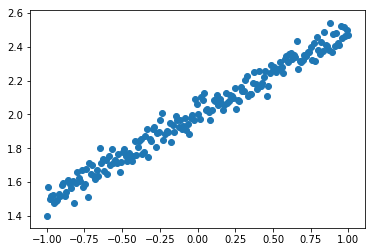

In [41]:
#生成数据
np.random.shuffle(x)
#一次函数+正态分布的noise
y=0.5*x+2+np.random.normal(0,0.05,(200,))

plt.scatter(x,y)
plt.show()

x_train,y_train = x[:160],y[:160] #训练集
x_test,y_test = x[160:],y[160:] #测试集

In [48]:
#构建模型
model = Sequential()
model.add(Dense(input_dim=1,units=1)) #Dense(output_dim=1,input_dim=1)
# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd') #用sgd解线性回归

In [53]:
#训练
print('Training -----------')
for step in range(300):
    cost = model.train_on_batch(x,y)
    if step%100==0:
        print('train cost: ', cost)

Training -----------
train cost:  0.0021927357
train cost:  0.0021903752
train cost:  0.002189764


In [56]:
#测试
print('\nTesting ------------')
cost = model.evaluate(x,y,batch_size=40)
print('test cost:', cost)
W,b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
200/200 [==============================] - 0s 44us/step
test cost: 0.0021896057529374956
Weights= [[0.49821642]] 
biases= [2.0002165]


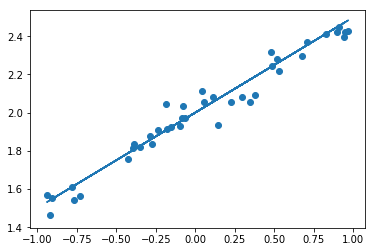

In [57]:
#可视化
y_predict= model.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict)
plt.show()